# 1. ZADAĆA

TODO: 
- uvod
    - ideja
    - cilj?
    - prilagodba baze podataka- kopiranje, 1-5BR
---------------------------
- mali pregled pandas-a

In [1]:
import pandas as pd 
loto = pd.read_excel('Loto7od39.xls')

In [2]:
loto.columns

Index(['KOLO', 'DATUM', '1BR', '2BR', '3BR', '4BR', '5BR', '6BR', '7BR',
       'ZLATNA KUGLICA', 'SLOVO ZA "SUPER7"', 'DOBITAK"7"', 'DOBITAK "SUPER7"',
       'JOKER', 'UPLATA LOTO 7/39', 'UKUPNO ZA "7"', 'UPLATA "SUPER7"',
       'UKUPNO ZA "SUPER7"'],
      dtype='object')

In [3]:
loto.head()

,KOLO,DATUM,1BR,2BR,3BR,4BR,5BR,6BR,7BR,ZLATNA KUGLICA,"SLOVO ZA ""SUPER7""","DOBITAK""7""","DOBITAK ""SUPER7""",JOKER,UPLATA LOTO 7/39,"UKUPNO ZA ""7""","UPLATA ""SUPER7""","UKUPNO ZA ""SUPER7"""
0,104.0,30.12.,1,2,8,9,10,13,16,NE,B,-,-,296138.0,1520966.7,10000000,299564.1,1.70123e+07
1,103.0,27.12.,1,3,7,9,21,27,36,NE,A,-,-,977316.0,1173935.7,10000000,225656.1,1.69336e+07
2,102.0,23.12.,8,12,13,21,27,30,39,NE,B,-,-,718903.0,1444570.2,10000000,283858.2,1.68744e+07
3,101.0,20.12.,4,8,16,17,18,19,25,NE,B,-,-,987865.0,1344880.8,10000000,260028.9,1.67999e+07
4,100.0,16.12.,3,8,9,12,17,29,34,NE,A,-,-,837929.0,1464625.8,10000000,273955.5,1.67316e+07


In [4]:
loto.dtypes

KOLO                  float64
DATUM                  object
1BR                     int64
2BR                     int64
3BR                     int64
4BR                     int64
5BR                     int64
6BR                     int64
7BR                     int64
ZLATNA KUGLICA         object
SLOVO ZA "SUPER7"      object
DOBITAK"7"             object
DOBITAK "SUPER7"       object
JOKER                 float64
UPLATA LOTO 7/39      float64
UKUPNO ZA "7"          object
UPLATA "SUPER7"       float64
UKUPNO ZA "SUPER7"     object
dtype: object

--------------------
# Pogledajmo DATUM

In [5]:
loto[['KOLO','DATUM']][0:901:50]

,KOLO,DATUM
0,104.0,30.12.
50,54.0,8.7.
100,4.0,14.1.
150,59.0,23.7.
200,9.0,30.1.
250,63.0,8.8.
300,13.0,14.2.
350,68.0,23.8.
400,18.0,1.3.
450,72.0,07.09.


Uočimo da se u bazi nalaze datumi na razne načine zapisani te ponegdje nisu navedene godine. Budući da će nam biti potrebni točni datumi za izradu određenih grafova te pregled kola po godinama stoga na početku prilagodimo bazu podataka budućim zahtjevima.

### DATUM convertiramo iz object u date time
TODO: pseudokod?

Postupak:
1. iz stringa DATUM izvuc dan 
2. iz stringa DATUM izvuc mjesec
3. dodati godinu ovisno o kolu
4. nova tri stupca spojis u datum

In [6]:
num_of_rows= loto["KOLO"].count()
num_of_rows

939

In [7]:
def convert_date():
    year= []
    month= []
    dani= []
    y=2017
    for i in range (0, num_of_rows ):
        first_dot= loto['DATUM'][i].find(".")
        d= int(loto['DATUM'][i][0:first_dot])
        second_dot= loto['DATUM'][i].find(".", first_dot + 1)
        m = int(loto['DATUM'][i][first_dot+1:second_dot])

        if (i>0 and (loto['KOLO'][i-1]<loto['KOLO'][i] ) ):
            y = y- 1


        month.append(m)
        dani.append(d)
        year.append(y)

    loto['DAN']= dani
    loto['MJESEC']= month
    loto['GOD']= year
    loto['DATUM'] = pd.to_datetime(dict(year=loto['GOD'], month=loto['MJESEC'], day=loto['DAN']))

In [8]:
convert_date()

#### Drugi naćim konvertiranja u objekat koji preponaje format datuma
TODO: ubaci ga u code

for i in range (0, num_of_rows ):
    god = "2017"
    first_dot= loto['DATUM'][i].find(".")
    dan= (loto['DATUM'][i][0:first_dot])
    second_dot= loto['DATUM'][i].find(".", first_dot + 1)
    mj = (loto['DATUM'][i][first_dot+1:second_dot])
    date=dan + "-" + mj + "-" + god
    #print ( date )
    loto['DATUM'].replace(to_replace=loto['DATUM'][i], value=date, inplace=True)

In [9]:
loto[['KOLO','DATUM']][0:901:50]

,KOLO,DATUM
0,104.0,2017-12-30
50,54.0,2017-07-08
100,4.0,2017-01-14
150,59.0,2016-07-23
200,9.0,2016-01-30
250,63.0,2015-08-08
300,13.0,2015-02-14
350,68.0,2014-08-23
400,18.0,2014-03-01
450,72.0,2013-09-07


In [10]:
loto.dtypes

KOLO                         float64
DATUM                 datetime64[ns]
1BR                            int64
2BR                            int64
3BR                            int64
4BR                            int64
5BR                            int64
6BR                            int64
7BR                            int64
ZLATNA KUGLICA                object
SLOVO ZA "SUPER7"             object
DOBITAK"7"                    object
DOBITAK "SUPER7"              object
JOKER                        float64
UPLATA LOTO 7/39             float64
UKUPNO ZA "7"                 object
UPLATA "SUPER7"              float64
UKUPNO ZA "SUPER7"            object
DAN                            int64
MJESEC                         int64
GOD                            int64
dtype: object

In [11]:
loto.head()

,KOLO,DATUM,1BR,2BR,3BR,4BR,5BR,6BR,7BR,ZLATNA KUGLICA,...,"DOBITAK""7""","DOBITAK ""SUPER7""",JOKER,UPLATA LOTO 7/39,"UKUPNO ZA ""7""","UPLATA ""SUPER7""","UKUPNO ZA ""SUPER7""",DAN,MJESEC,GOD
0,104.0,2017-12-30,1,2,8,9,10,13,16,NE,...,-,-,296138.0,1520966.7,10000000,299564.1,1.70123e+07,30,12,2017
1,103.0,2017-12-27,1,3,7,9,21,27,36,NE,...,-,-,977316.0,1173935.7,10000000,225656.1,1.69336e+07,27,12,2017
2,102.0,2017-12-23,8,12,13,21,27,30,39,NE,...,-,-,718903.0,1444570.2,10000000,283858.2,1.68744e+07,23,12,2017
3,101.0,2017-12-20,4,8,16,17,18,19,25,NE,...,-,-,987865.0,1344880.8,10000000,260028.9,1.67999e+07,20,12,2017
4,100.0,2017-12-16,3,8,9,12,17,29,34,NE,...,-,-,837929.0,1464625.8,10000000,273955.5,1.67316e+07,16,12,2017


Funkcija convert_date() dijeluje na stupac 'DATUM' te kao rezultat daje pregledan zapis datuma.

Budući da nam stupci DAN, MJESEC više nisu potrebni možemo ih obrisati. Radi preglednosti tip podataka stupca 'KOLO' iz float prebacimo u integer. 

In [12]:
del loto['DAN'], loto['MJESEC']

In [13]:
loto['KOLO'][:10]

0    104.0
1    103.0
2    102.0
3    101.0
4    100.0
5     99.0
6     98.0
7     97.0
8     96.0
9     95.0
Name: KOLO, dtype: float64

----------------------------
TODO: mali pregled numpy-a

In [14]:
import numpy as np
loto['KOLO'] = loto['KOLO'].astype(np.int64)

In [15]:
loto.dtypes

KOLO                           int64
DATUM                 datetime64[ns]
1BR                            int64
2BR                            int64
3BR                            int64
4BR                            int64
5BR                            int64
6BR                            int64
7BR                            int64
ZLATNA KUGLICA                object
SLOVO ZA "SUPER7"             object
DOBITAK"7"                    object
DOBITAK "SUPER7"              object
JOKER                        float64
UPLATA LOTO 7/39             float64
UKUPNO ZA "7"                 object
UPLATA "SUPER7"              float64
UKUPNO ZA "SUPER7"            object
GOD                            int64
dtype: object

## Pojavljivanje brojeva
- kreiramo vektor tako da vektor[0] odgovara broju 1 => potrebno je vektora duljine 39
- funkcija koja trci kroz sve brojeve i gleda koji se pojavljuju

In [16]:
draw_number= np.zeros([39, 2], dtype=np.int64)
#popuni prvi stupac
for i in range (0, 39):
    draw_number[i][0]=i+1
draw_number

array([[ 1,  0],
       [ 2,  0],
       [ 3,  0],
       [ 4,  0],
       [ 5,  0],
       [ 6,  0],
       [ 7,  0],
       [ 8,  0],
       [ 9,  0],
       [10,  0],
       [11,  0],
       [12,  0],
       [13,  0],
       [14,  0],
       [15,  0],
       [16,  0],
       [17,  0],
       [18,  0],
       [19,  0],
       [20,  0],
       [21,  0],
       [22,  0],
       [23,  0],
       [24,  0],
       [25,  0],
       [26,  0],
       [27,  0],
       [28,  0],
       [29,  0],
       [30,  0],
       [31,  0],
       [32,  0],
       [33,  0],
       [34,  0],
       [35,  0],
       [36,  0],
       [37,  0],
       [38,  0],
       [39,  0]])

In [17]:
def appearence_num (): 
    for i in range (0, num_of_rows):
        draw_number[loto['1BR'][i] -1 ][1] +=1
        draw_number[loto['2BR'][i] -1 ][1] +=1
        draw_number[loto['3BR'][i] -1 ][1] +=1
        draw_number[loto['4BR'][i] -1 ][1] +=1
        draw_number[loto['5BR'][i] -1 ][1] +=1
        draw_number[loto['6BR'][i] -1 ][1] +=1
        draw_number[loto['7BR'][i] -1 ][1] +=1


In [18]:
def out_appearence_num():
    for i in range (0, 39):
        print ( draw_number[i][0], '->', draw_number[i][1])

In [19]:
appearence_num()
out_appearence_num()

1 -> 195
2 -> 157
3 -> 180
4 -> 172
5 -> 172
6 -> 167
7 -> 184
8 -> 174
9 -> 175
10 -> 154
11 -> 174
12 -> 137
13 -> 157
14 -> 169
15 -> 175
16 -> 158
17 -> 166
18 -> 161
19 -> 161
20 -> 161
21 -> 157
22 -> 197
23 -> 177
24 -> 177
25 -> 172
26 -> 182
27 -> 184
28 -> 171
29 -> 177
30 -> 177
31 -> 154
32 -> 169
33 -> 153
34 -> 165
35 -> 148
36 -> 159
37 -> 167
38 -> 163
39 -> 175


Provjerimo dali je funkcija dobra

In [20]:
num_of_rows*7 == sum(draw_number)[1]

True

Kako bi saznali koji su brojevi najviše a koji najmanje puta bili izvučeni, iskoristit ćemo funkcije .max() i .min().

In [21]:
num, draw= draw_number.T

In [22]:
draw.max(), draw.min()

(197, 137)

In [23]:
for i in range (0, 39):
    if draw_number[i][1] == draw.max():
        print ( 'Broj', i + 1, ' je izvućen ', draw.max(), ' puta.')
        break

Broj 22  je izvućen  197  puta.


In [24]:
for i in range (0, 39):
    if draw_number[i][1] == draw.min():
        print ( 'Broj', i + 1, ' je izvućen ', draw.min(), ' puta.')
        break

Broj 12  je izvućen  137  puta.


Prikažimo grafički koliko se koji broj izvlaćio.

In [25]:
from matplotlib import pyplot as plt
plt.plot(num, draw,  color='r') # 'ro' --> za tockasti graf
plt.xlabel('Number')
plt.ylabel('Draw')
plt.title('Plot of draw number')
plt.rcParams["figure.figsize"] = [16,9]
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black' )
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

In [26]:
#draw_number[draw_number < draw_number.max()]

- dodajem stupac SUMA

In [27]:
def add_column_SUMA():
    for i in range (0, num_of_rows):
        suma= loto['1BR'] + loto['2BR'] + loto['3BR'] + loto['4BR'] + loto['5BR'] + loto['6BR'] + loto['7BR']
        loto['SUMA']= suma

In [28]:
add_column_SUMA()

In [29]:
loto['SUMA'].max(), loto['SUMA'].min(), loto['SUMA'].mean()

(226, 59, 139.12140575079871)

#### Pogledajmo odnos između sume niza brojeva koji su izvučeni na određeni dan. Zatim pogledajmo kako se razvijalo u pojedinim godinama.

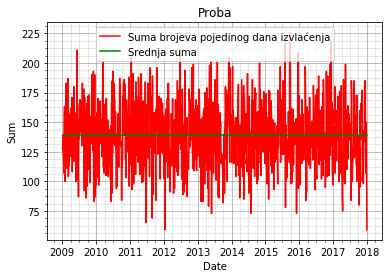

In [30]:
fig1, ax1 = plt.subplots()
ax1.set_title('Proba')
plt.xlabel('Date')
plt.ylabel('Sum')
plt.rcParams["figure.figsize"] = [16,9]
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey' )
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

ax1.plot(loto['DATUM'], loto['SUMA'], color='r', label='Suma brojeva pojedinog dana izvlaćenja')

sred = np.full(num_of_rows, loto['SUMA'].mean() , dtype=np.int64)
ax1.plot(loto['DATUM'], sred, color='g', label='Srednja suma')

ax1.legend(loc=9)

TODO: 
- uvod koliko puta je izvucena ista suma brojeva
- kreiram listu tako da lista[0] = sum_28

In [31]:
min_sum = 1 + 2 + 3 + 4 + 5 + 6 + 7
max_sum = 39 + 38 + 37 + 36 + 35 + 34 + 33
print ('Minimalna suma je ', min_sum, ' maksimalna suma je ', max_sum)

Minimalna suma je  28  maksimalna suma je  252


In [32]:
possible_sum= np.zeros([max_sum - min_sum + 1, 2], dtype=np.int64)
#popuni prvi stupac (vrijednost sume)
for i in range (0, max_sum - min_sum + 1):
    possible_sum[i][0]=i + min_sum

In [33]:
for i in range (0, num_of_rows):
    possible_sum[loto['SUMA'][i] - min_sum][1] += 1
#possible_sum

Sortirajmo danu listu possible_sum prema broju pojavljivanja pojedine sume

In [34]:
from operator import itemgetter, attrgetter
sorted(possible_sum, key=itemgetter(1))

[array([28,  0]),
 array([29,  0]),
 array([30,  0]),
 array([31,  0]),
 array([32,  0]),
 array([33,  0]),
 array([34,  0]),
 array([35,  0]),
 array([36,  0]),
 array([37,  0]),
 array([38,  0]),
 array([39,  0]),
 array([40,  0]),
 array([41,  0]),
 array([42,  0]),
 array([43,  0]),
 array([44,  0]),
 array([45,  0]),
 array([46,  0]),
 array([47,  0]),
 array([48,  0]),
 array([49,  0]),
 array([50,  0]),
 array([51,  0]),
 array([52,  0]),
 array([53,  0]),
 array([54,  0]),
 array([55,  0]),
 array([56,  0]),
 array([57,  0]),
 array([58,  0]),
 array([60,  0]),
 array([61,  0]),
 array([62,  0]),
 array([63,  0]),
 array([64,  0]),
 array([66,  0]),
 array([67,  0]),
 array([68,  0]),
 array([70,  0]),
 array([71,  0]),
 array([72,  0]),
 array([74,  0]),
 array([76,  0]),
 array([77,  0]),
 array([81,  0]),
 array([195,   0]),
 array([203,   0]),
 array([204,   0]),
 array([206,   0]),
 array([207,   0]),
 array([208,   0]),
 array([212,   0]),
 array([213,   0]),
 array([214,

In [35]:
suma, appear = possible_sum.T
br=0
lista = []
print ('Sume koje se pojavljuju ', appear.min(), 'puta (ujedno i minimalno): ')
for i in range (0, max_sum - min_sum +1):
    if possible_sum[i][1] == appear.min():
        lista.insert (br, i + min_sum)
        br += 1
print(lista)

Sume koje se pojavljuju  0 puta (ujedno i minimalno): 
[28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 66, 67, 68, 70, 71, 72, 74, 76, 77, 81, 195, 203, 204, 206, 207, 208, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252]


In [36]:
br / (max_sum - min_sum) * 100 

40.17857142857143

Uoćimo da se čak 90 od 224 suma jos nikada nisu pojavile tj 40.1786% se nikada nisu pojavile.

In [37]:
print ('Sume koje se pojavljuju najčešće tj.', appear.max(), 'puta: ')
for i in range (0, max_sum - min_sum +1):
    if possible_sum[i][1] == appear.max():
        print (i + min_sum)

Sume koje se pojavljuju najčešće tj. 17 puta: 
119
143


#### Provjerimo je li koji niz dva puta izvučen

In [38]:
def twice_draw (array_num_):
    #print(array_num_)
    br = 0
    suma = sum(array_num_)
    #print (suma)
    for i in range (0, num_of_rows):
        if loto['SUMA'][i] == suma:
            if loto['1BR'][i]  == array_num_[0] and loto['2BR'][i]  == array_num_[1] and loto['3BR'][i]  == array_num_[2] and loto['4BR'][i]  == array_num_[3] and loto['5BR'][i]  == array_num_[4] and loto['6BR'][i]  == array_num_[5] and loto['7BR'][i]  == array_num_[6] :
                br += 1
    #print ( 'Niz se pojavljuje', br, 'puta')
    return ( br )

In [39]:
for i in range (0, num_of_rows):
    array_num = []
    array_num.append (loto['1BR'][i])
    array_num.append (loto['2BR'][i])
    array_num.append (loto['3BR'][i])
    array_num.append (loto['4BR'][i])
    array_num.append (loto['5BR'][i])
    array_num.append (loto['6BR'][i])
    array_num.append (loto['7BR'][i])
    appear_array = twice_draw (array_num)
    if appear_array > 1 :
        print (array_num, 'se pojavljuje', appear_array, 'puta')

------------------
# IDEJE
- za svaku godinu graf -suma - datum
- bolje dodaj histogram
- vjv pojave pojedniog broja
- kolko puta je izvucena ista suma brojeva
- 3D graf broj - broj - suma - 
- funk za provjeru dali je izvucen isti niz brojeva
- struktura- nizovi ? za sada uspjesno zaobilazim to
- rekurzivna funkcija za moguće nizove
    - u funkciju dodati ograničenost na sumu niza, sumu vjv pojave pojedinog broja, vjv pojave dva broja u kombinaciji.. dok ne dodes do kolicine nizova koji su mozda smisleni
- kolicina pojave određena dva/tri.. broja zajedno
- izvucen dobitak - kolika uplata/sumaNiza spram ostalih izvlacenja
- analiza gdje su dobitnici